# K均值聚类

该算法（英文简称“K-Means”）是非常简单的聚类算法（**聚类属于无监督学习**）。

给定一组固定的群集和一个输入数据集合，该算法尝试把数据集合划分到群集以致群集有高的类内相似度和低的类间相似度。

- 初始化若干群中心，要么是输入数据范围内的随机选择、要么是某些已存在的训练样本内的随机选择，推荐后者
- 直到收敛
  - 把每个数据点分配到最近的群，数据点到群中心的距离采用欧几里德距离
  - 更新各群中心的当前估计，即每个群所属实例距离的平均值

## 目标函数

潜在的目标函数尝试寻找各群中心以致如果数据被划分到相应的群，各数据点和各自最近的群中心之间的距离尽可能的小。

给定一组数据点 $(x_1,\ldots,x_n)$ 和一个正数 $k$ 查找群集 $(C_1,\ldots,C_k)$ 使得下式最小化： $$J=\sum_{i=1}^n \,\sum_{j=1}^k\,z_{ij}\,|| x_i - \mu_j ||_2$$

其中：

- $z_{ij} \in \{0,1\}$ 定义数据点 $x_i$ 属于群 $C_j$ 否
- $\mu_j$ 表示群 $C_j$ 的中心
- $||\,||_2$ 表示欧几里德距离

## 缺点

- 必须一开始就设定好群的个数
- 结果依赖初始化的各群中心
- 异常值敏感
- 不适合寻找非凸群集
- 不保证全局最优（会被局部最小卡住）

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs

np.random.seed(123)

## 数据集合

Shape of dataset is (1000L, 2L)


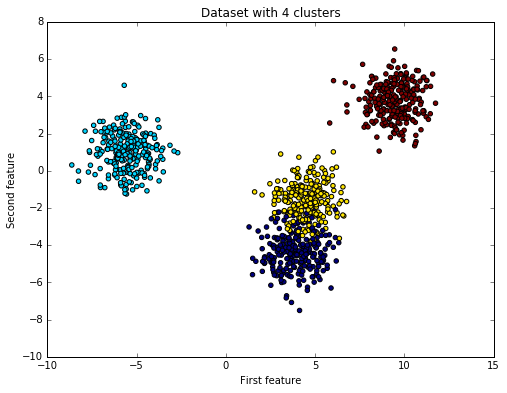

In [30]:
X, y = make_blobs(centers=4, n_samples=1000)
print "Shape of dataset is {0}".format(X.shape)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

## K-Means类

In [31]:
class KMeans:
    def __init__(self, n_clusters=4):
        self.k = n_clusters
    def fit(self, data):
        '''K-Means模型适配给定的数据集合'''
        n_samples, _ = data.shape
        # 初始化各群中心
        self.centers = np.array(random.sample(list(data), self.k))
        self.initial_centers = np.copy(self.centers)
        
        # 持续跟踪数据点到群集的分配变化否，若不再变化则完成模型适配
        old_assigns = None
        n_iters = 0
        
        while True:
            new_assigns = [self.classify(datapoint) for datapoint in data]
            
            if new_assigns == old_assigns:
                print "Training finished after {0} iterations".format(n_iters)
                return
            
            old_assigns = new_assigns
            n_iters += 1
            
            # 重新计算各个中心
            for id_ in range(self.k):
                points_idx = np.where(np.array(new_assigns) == id_)
                datapoints = data[points_idx]
                self.centers[id_] = datapoints.mean(axis=0)
    def l2_distance(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists
    def classify(self, datapoint):
        '''给定一个数据点，计算离该点最近的群，返回此群的ID'''
        dists = self.l2_distance(datapoint)
        return np.argmin(dists)
    def plot_clusters(self, data):
        plt.figure(figsize=(12,10))
        plt.title("Initial centers in blue, final centers in red")
        plt.scatter(data[:,0], data[:,1], marker=".", c=y)
        plt.scatter(self.centers[:,0], self.centers[:,1], c="r")
        plt.scatter(self.initial_centers[:,0], self.initial_centers[:,1], c="b")
        plt.show()

## 初始化并适配模型

In [32]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

Training finished after 3 iterations


## 绘制初始化群集中心和最终群集中心

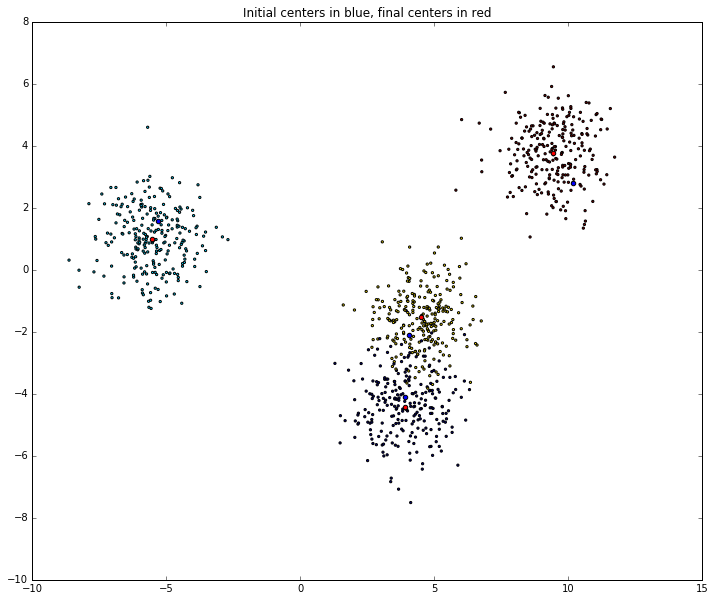

In [33]:
kmeans.plot_clusters(X)